# C964 Task 2 (Part C) - Kol Leclair

### Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

### Accessing and processing the data.

In [2]:
df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movie_titles = pd.read_csv('Movie_Id_Titles')
df = pd.merge(df, movie_titles, on='item_id')
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

### Visualizing the data.

The visualizations in this section are the descriptive method.

This is a histogram that shows the number of ratings for each movie.

<Axes: >

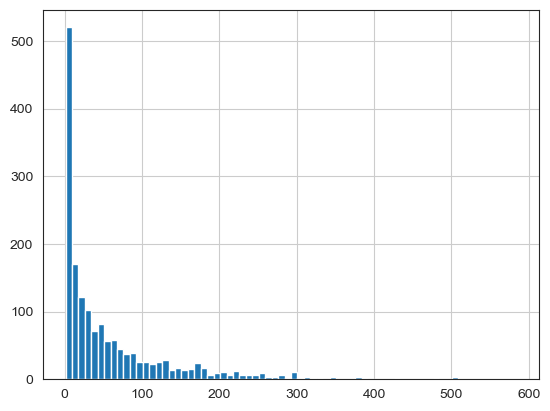

In [10]:
ratings['num of ratings'].hist(bins=70)

This is a histogram that shows the mean rating of each movie.

<Axes: >

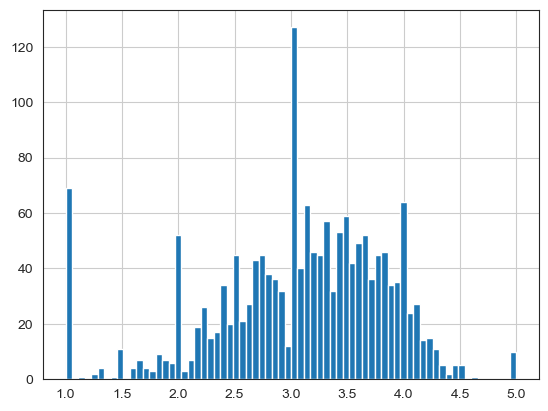

In [4]:
ratings['rating'].hist(bins=70)

This is a scatterplot that shows the correlation between the number of ratings and the mean rating of each movie.

<Axes: xlabel='rating', ylabel='num of ratings'>

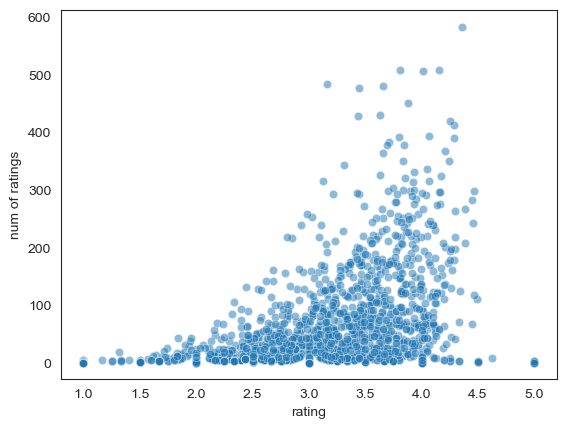

In [12]:
sns.scatterplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

### Getting user input.

Please select the movie from the drop-down menu that you would like similar recommendations for.

In [6]:
movie_widget = widgets.Dropdown(
    options=movie_titles['title'],
    description='Movie:',
    disabled=False,
)

movie_widget

Dropdown(description='Movie:', options=('Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', 'Get Shor…

### Developing the model.

In [7]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
movie_user_ratings = moviemat[movie_widget.value]
similar_to_movie = moviemat.corrwith(movie_user_ratings)
corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
corr_movie.dropna(inplace=True)
corr_movie = corr_movie.join(ratings['num of ratings'])

C:\Users\lecla\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\lecla\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Ignore any warning that may appear from the code snippet above.

### Showing the recommendations.

This is the non-descriptive method because the application will make a predication about the movies you will like based on the provided data.

In [8]:
corr_movie[corr_movie['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


The correlation value allows us to know how accurate the recommendation is.

1.0 = Most Accurate <br>
0.0 = Least Accurate